## Figure 2

code for generating each plot in Fig. 2

Imports and needed data:

In [1]:
import sys
import os

# Get the absolute path to the project root (one directory up from notebooks/)
root_path = os.path.abspath("..")
sys.path.append(root_path)

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.stats import pearsonr
# import matplotlib.lines as mlines
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

from src import figure_Tools as fT

Needed datasets:

In [2]:
# read in pre-save contour plot data
with open('../Data/Contour_plot.pkl', 'rb') as handle:
    contour_data = pickle.load(handle)
# dendrite point estimates
df_point = pd.read_pickle('../Data/Point_data.pkl')

In [3]:
# Will need to fix this, but convert PCs to floats
df_point.PC1 = [float(i) for i in df_point.PC1.values]
df_point.PC2 = [float(i) for i in df_point.PC2.values]
df_point.PC3 = [float(i) for i in df_point.PC3.values]

### Figure 2a - Dendrite subtype contour plots.

Once each individual dendrite is aligned to its internal principle axis, and scaled so that 1 = the type specific (T4, T5) population standard deviation along the $y$-axis, we can overlay dendrites in the same aligned scaled space. We spatially offset each subtype, and add a KDE for the point density. Individual dendrites are all centred at the first branch point (red points)

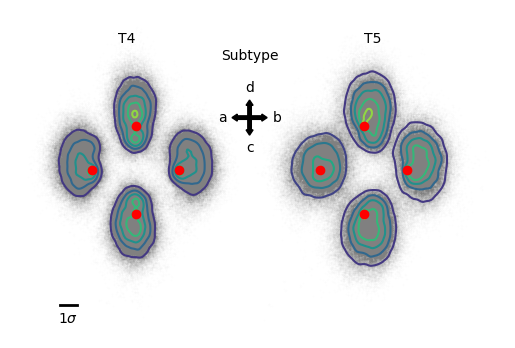

In [4]:
fig, ax = plt.subplots()



# generate plot
fT.subtype_contour_plot(ax, contour_data)

# add DV/AP compass
fT.ax_compass(ax)

# add text labels (T4, T5 and Compass title)
ax.text(0,6.5, 'Subtype', ha= 'center', va = 'center', fontsize = 10)
ax.text(-7,7.5, 'T4', ha= 'center', va = 'center', fontsize = 10)
ax.text(7,7.5, 'T5', ha= 'center', va = 'center', fontsize = 10)

ax.autoscale(enable = True, axis = 'x', tight = True)

### Figure 2c

Distribution of the Angles of the first principle axis of each dendrite relative to the global DV axis by Type.

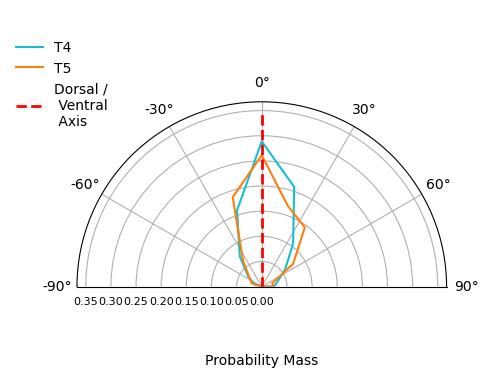

In [5]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

x0 = -np.pi
x1 = np.pi

for i in range(len(fT.Types)):
    t = fT.Types[i]
    c = fT.Type_colours[i]

    r, theta = np.histogram(df_point.loc[df_point.Type == t,'PC1_angle'].values, range = (x0,x1), bins = 20)
    r = r / r.sum()

    ax.plot(theta[1:], r, color = c, label = t, lw = 1.5)

ax.plot([0,0],[0,0.35], color = 'r', lw = 2, ls = '--', label = 'Dorsal / \n Ventral \n Axis')

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xlim(-np.pi/2,np.pi/2)
ax.legend(frameon = False, fontsize = 10, loc = 'upper left',bbox_to_anchor=(-0.2, 0.95))
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('Probability Mass', fontsize = 10)
ax.xaxis.set_label_coords(0.5, .07)

### Figure 2d

variance explained by each principle component split by type and subtype. Error bars show median absolute deviation

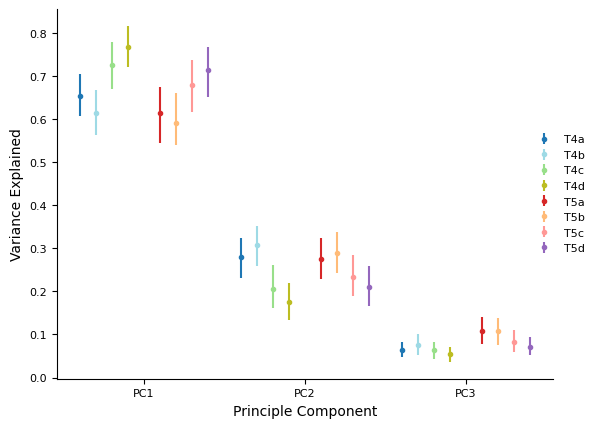

In [6]:
fig, ax = plt.subplots()

x = np.array([1,2,3])
offsets = [-0.4,-0.3,-0.2,-0.1,0.1,0.2,0.3,0.4]

for i in range(len(fT.Subtypes)):
    t = fT.Subtypes[i]
    c = fT.Subtype_colours[i]
    data = df_point.loc[df_point.Subtype == t,['PC1','PC2','PC3']].values
    mads = fT.asymmetric_mad(data)
    ax.errorbar(x = x + offsets[i], y = mads[0], yerr = mads[1:3], fmt = 'o', label = t, color = c, ms = 3)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Principle Component', fontsize=10)
ax.set_ylabel('Variance Explained', fontsize = 10)
ax.set_xticks(x,labels = ['PC1','PC2','PC3'])
ax.legend(frameon = False, fontsize = 8, bbox_to_anchor=(.95, 0.5), loc='center left', borderaxespad=0.)

### Figure 2e

Scatter plot showing the relationship between variance explained by PC1 and PC2 for each dendrite type (T4, T5)


Text(0, 0.5, 'PC2 Variance Explained')

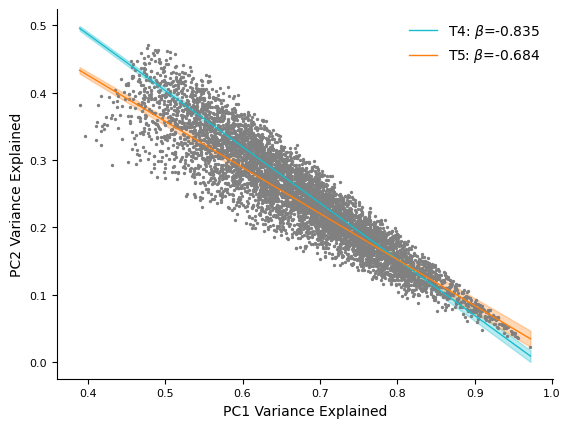

In [7]:
fig, ax = plt.subplots()

fT.regPlot(
    ax = ax,
    df = df_point,
    DV = 'PC2',
    IV_col  = "PC1",
    group_col = 'Type',
    groups = fT.Types,
    colours = fT.Type_colours,
    line_kwargs = {'linewidth':1},
    point_kwargs = {'s':2,'c':'gray'},
    fill_kwargs = {'alpha':0.3},
    legend_kwargs = {'frameon':False,'loc':"upper right"} ,
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('PC1 Variance Explained', fontsize=10)
ax.set_ylabel('PC2 Variance Explained', fontsize = 10)


### Figure 2f

probability mass function of dendrite convex hull volumes by type, showing absolute spanned areas of each dendrite.

Back horizontal bar shows the difference between the two population means.

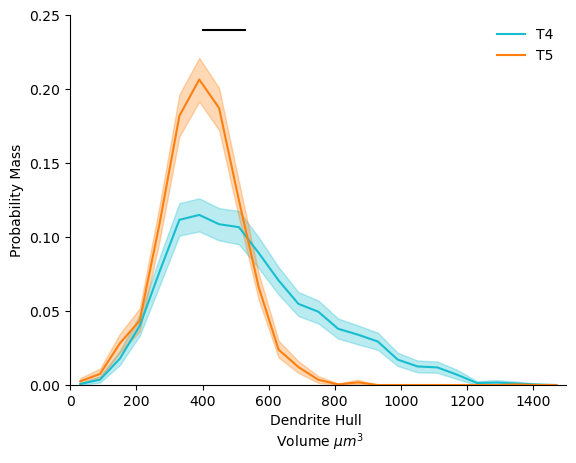

In [8]:
fig, ax  = plt.subplots()

fT.point_value_PMF_df(ax = ax, 
                      df = df_point, 
                      DV = 'Hull_volume',
                      group_col = 'Type',
                      groups = fT.Types,
                      colours = fT.Type_colours,
                      x0 = 0,
                      x1 = 1500,
                      num_bins = 25,
                      num_bootstraps = 1000,
                      fill_kwargs = {'alpha':0.3}
                      )

# add horizontal line showing different in means
group_means = df_point.groupby('Type')['Hull_volume'].mean()
ax.hlines(0.24, group_means.T5, group_means.T4, color = 'k')

ax.set_ylim([0,0.25])
ax.set_title("")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', labelsize=10)
# ax.set_xlabel('Dendrite Convex Hull \n Volume $(\mu m^3)$', fontsize=10)
ax.set_xlabel('Dendrite Hull \n Volume $\mu m^3$')
ax.set_ylabel('Probability Mass', fontsize = 10)
ax.legend(frameon = False, fontsize = 10)

### Figure 2g

As above, but with convex hul volume scaled by the volume of the neuropil layer each dendrite population innervates; T4 = Medulla layer 10, T5 = Lobula layer 1.

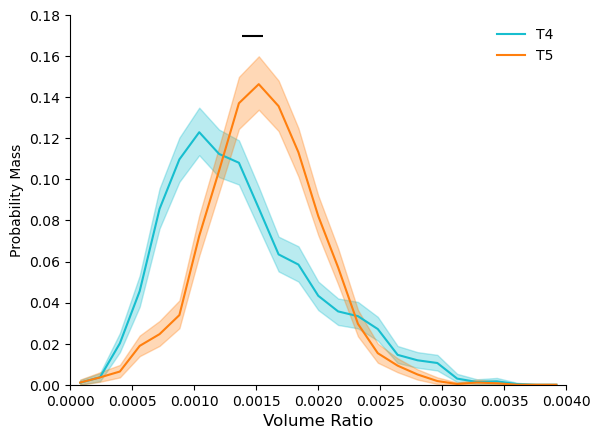

In [9]:
fig, ax  = plt.subplots()

fT.point_value_PMF_df(ax = ax, 
                      df = df_point, 
                      DV = 'Scaled_hull_volume',
                      group_col = 'Type',
                      groups = fT.Types,
                      colours = fT.Type_colours,
                      x0 = 0,
                      x1 = 0.004,
                      num_bins = 25,
                      num_bootstraps = 1000,
                      fill_kwargs = {'alpha':0.3}
                      )

# add horizontal line showing different in means
group_means = df_point.groupby('Type')['Scaled_hull_volume'].mean()
ax.hlines(0.17, group_means.T5, group_means.T4, color = 'k')

ax.set_ylim([0,0.18])
ax.set_title("")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', labelsize=10)
ax.set_xlabel(r'$\frac{\text{Dendrite Convex Hull Volume }(\mu m^3)}{\text{Neuropil Layer Volume }(\mu m^3)}$ ', fontsize = 12)
ax.set_xlabel('Volume Ratio')
ax.set_ylabel('Probability Mass', fontsize = 10)
ax.legend(frameon = False, fontsize = 10)

### Figure 2h

Scatter plots showing dendrite root positions for T4 (medulla, left) and Lobula (T5, right) on the DV / AP plane. Colour shows dendrite convex hull volume (shared for both T4 and T5), showing the long tail of T4 dendrite volumes occupies the ventral-anterior region. 

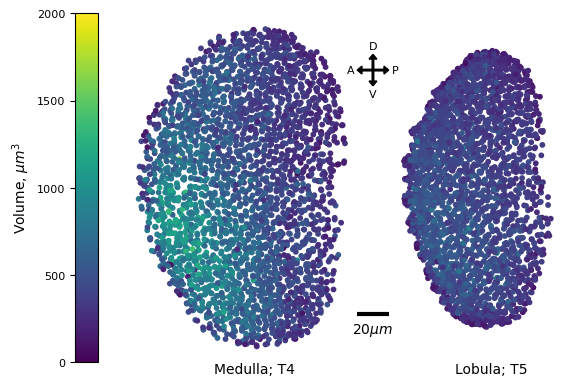

In [10]:
fig, ax = plt.subplots()


T4_coords = df_point.loc[df_point.Type == 'T4',['Root_x','Root_y']].values + np.array([-75,0])
T5_coords = df_point.loc[df_point.Type == 'T5',['Root_x','Root_y']].values + np.array([75,0])

ax.set_rasterized(True)
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=0, vmax=2000)

scatter = ax.scatter(
    T4_coords[:, 0],
    T4_coords[:, 1],
    c=df_point.loc[df_point.Type == "T4", "Hull_volume"],
    cmap=cmap,
    norm=norm,
    s = 10,
)
ax.scatter(
    T5_coords[:, 0],
    T5_coords[:, 1],
    c=df_point.loc[df_point.Type == "T5", "Hull_volume"],
    cmap=cmap,
    norm=norm,
    s = 10,
)
ax.hlines(-80, -10, 10, color="k", lw=3)
ax.text(0, -90,  r"$20\mu m$",ha = 'center', va = 'center', fontsize = 10)

# Create a divider for the existing axes instance
divider = make_axes_locatable(ax)

# Append a new axes to the left of the main axes.
# size="5%" makes the colorbar width 5% of the main axes' width.
# pad=0.1 creates a padding of 0.1 inches.
cax = divider.append_axes("left", size="5%", pad=0.2)

# Add the color bar to the new axes
cbar = plt.colorbar(scatter, cax=cax, location='left', ticklocation='left')


cbar.set_label(r"Volume, $\mu m^3$", fontsize=10)
# Customize the color bar ticks and labels
tick_labels = np.linspace(0, 2000, num=5, endpoint=True)
cbar.set_ticks(ticks=tick_labels)
cbar.set_ticklabels([f"{int(t)}" for t in tick_labels], fontsize=8)

# add compass
fT.ax_compass(ax,
            start_point = [0,75],
            arrow_length = 10,
            arrow_scale = 2,
            arrow_text = ['A','P','V','D'],
            arrow_props = {
                'head_width': 5,
                'head_length': 3,
                'width': 1,
                'length_includes_head': True,
                'zorder': 5
            },
            fontsize = 8
        )


ax.text(-75,-115, 'Medulla; T4', ha= 'center', va = 'center', fontsize = 10)
ax.text(75,-115, 'Lobula; T5', ha= 'center', va = 'center', fontsize = 10)

ax.axis("off")
ax.set_aspect("equal")
